# PROBLEM STATEMENT

You have been hired as a consultant to a start-up that is running a targetted marketing ads on facebook. The company wants to anaylze customer behaviour by predicting which customer clicks on the advertisement. Customer data is as follows:

Inputs:
- Name
- e-mail
- Country
- Time on Facebook
- Estimated Salary (derived from other parameters)

Outputs:
- Click (1: customer clicked on Ad, 0: Customer did not click on the Ad)



# STEP #0: LIBRARIES IMPORT


In [427]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# STEP #1: IMPORT DATASET

In [428]:
# Read the data using pandas dataframe

dataset = pd.read_csv('https://raw.githubusercontent.com/renatomaaliw3/public_files/master/Data%20Sets/Facebook_Ads_2.csv', encoding='ISO-8859-1')

In [429]:
# Show the data head!

dataset.head()

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0


In [430]:
# Show the data tail!

dataset.tail()

,Names,emails,Country,Time Spent on Site,Salary,Clicked
494,Rigel,egestas.blandit.Nam@semvitaealiquam.com,Sao Tome and Principe,19.222746,44969.13495,0
495,Walter,ligula@Cumsociis.ca,Nepal,22.665662,41686.20425,0
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,35.320239,23989.80864,0
497,Pearl,penatibus.et@massanonante.com,Philippines,26.539170,31708.57054,0
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,32.386148,74331.35442,1


# STEP #2: EXPLORE/VISUALIZE DATASET

In [431]:
# Check for missing data

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Names               499 non-null    object 
 1   emails              499 non-null    object 
 2   Country             499 non-null    object 
 3   Time Spent on Site  499 non-null    float64
 4   Salary              499 non-null    float64
 5   Clicked             499 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 23.5+ KB


1    250
0    249
Name: Clicked, dtype: int64

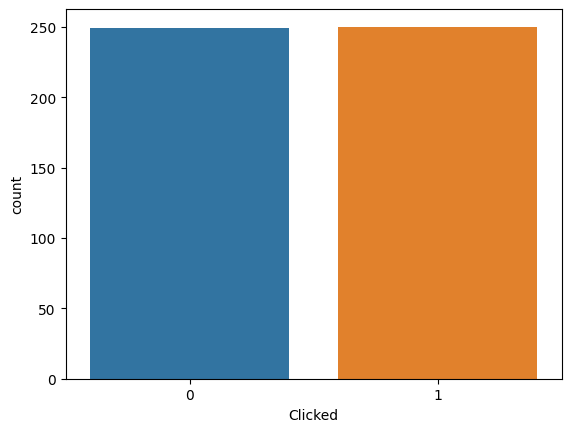

In [432]:
# Check click counts

sns.countplot(x = 'Clicked', data = dataset)
dataset['Clicked'].value_counts()

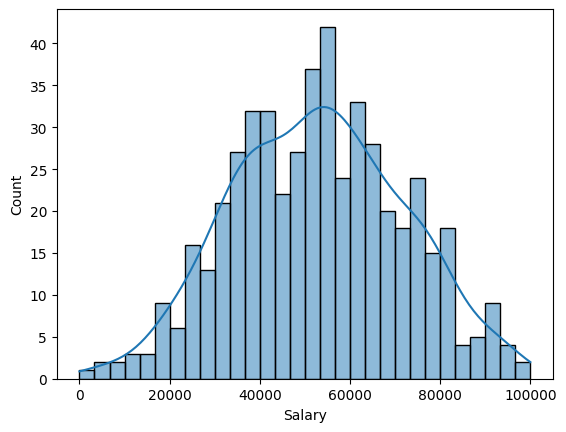

In [433]:
# Check Salary Distribution via Histogram

#dataset['Salary'].plot.hist(bins = 30)
#plt.hist(dataset['Salary'], bins = 30)
sns.histplot(dataset['Salary'], bins = 30, kde = True)
#dataset['Salary'].plot(kind = 'hist', bins = 30)
plt.show()

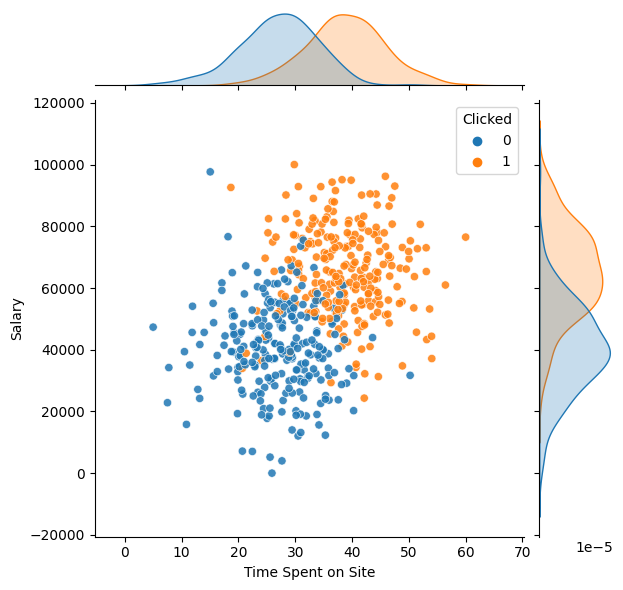

In [434]:
# Check JointPlot (Time Spent vs. Salary)

sns.jointplot(x = 'Time Spent on Site', y = 'Salary', hue = 'Clicked', data = dataset, alpha = 0.85, color = 'green')

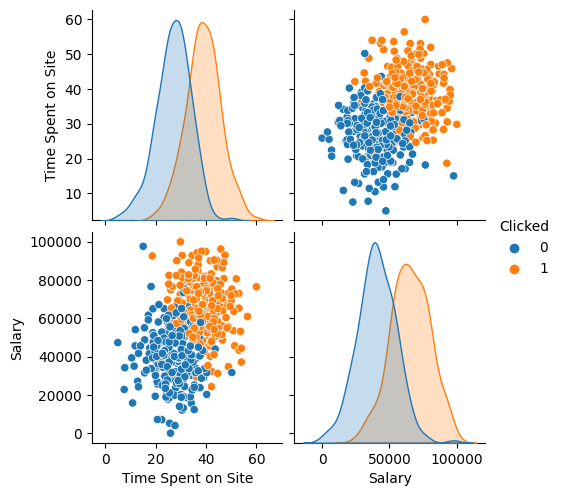

In [435]:
# Check A PairPlot (Clicked)

sns.pairplot(data = dataset, hue = 'Clicked')
plt.show()

# STEP #3: PREPARE THE DATA FOR TRAINING/ DATA CLEANING

In [436]:
dataset.head(3)

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0


In [437]:
#Let's drop the emails, country and names (we can make use of the country later!)

new_data = dataset.drop(['Names', 'emails', 'Country'], axis = 1)

In [438]:
new_data.head()

,Time Spent on Site,Salary,Clicked
0,25.649648,55330.06006,0
1,32.456107,79049.07674,1
2,20.945978,41098.60826,0
3,54.039325,37143.35536,1
4,34.249729,37355.11276,0


In [439]:
# Since we are going to normalize/scale the data, let us insert validation set for prediction testing (unseen data)

sample_data = np.array([[13.45, 5000, 10]])

validation_data = pd.DataFrame(sample_data, index = [499], columns = list(new_data.columns))
validation_data

,Time Spent on Site,Salary,Clicked
499,13.45,5000.0,10.0


In [440]:
new_data = pd.concat([new_data, validation_data], axis = 0)
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Time Spent on Site  500 non-null    float64
 1   Salary              500 non-null    float64
 2   Clicked             500 non-null    float64
dtypes: float64(3)
memory usage: 15.6 KB


In [441]:
#Let's drop the target coloumn before we do train test split

X = new_data.drop('Clicked', axis = 1)
y = new_data['Clicked']

In [442]:
# Feature Scaling/Normalization

from sklearn.preprocessing import StandardScaler, MinMaxScaler

sc = StandardScaler()
X = sc.fit_transform(X)

pd.DataFrame(X, columns = list(new_data.columns[:2]))

,Time Spent on Site,Salary
0,-0.792349,0.132598
1,-0.046581,1.376281
2,-1.307719,-0.613614
3,2.318243,-0.821003
4,0.149942,-0.809900
...,...,...
495,-1.119297,-0.582804
496,0.267236,-1.510696
497,-0.694886,-1.105971
498,-0.054246,1.128912


In [443]:
# Remove index 499 (validation data)

X = X[:500,:]
X

array([[-7.92348743e-01,  1.32598317e-01],
       [-4.65806592e-02,  1.37628113e+00],
       [-1.30771909e+00, -6.13613565e-01],
       [ 2.31824308e+00, -8.21003278e-01],
       [ 1.49942409e-01, -8.09899991e-01],
       [ 2.09588870e+00,  1.45983866e+00],
       [ 1.09569150e+00,  4.77526867e-01],
       [-7.89360651e-01, -1.20334903e+00],
       [ 8.56490183e-01, -9.71081778e-01],
       [-3.49945685e-01, -6.13599379e-01],
       [ 4.28775734e-02,  6.95179701e-02],
       [ 1.80749456e-01, -1.18392089e+00],
       [-8.29158316e-01, -4.73856553e-01],
       [ 1.49663685e+00, -2.16956343e-01],
       [ 5.29797547e-01,  6.23690765e-01],
       [-8.57307683e-01, -1.83735352e+00],
       [ 9.00068290e-01, -1.75015092e-01],
       [-8.89654139e-01, -7.50685734e-01],
       [ 1.75187124e+00, -9.45214762e-01],
       [-5.53032712e-01, -6.06506745e-02],
       [-1.72872229e+00,  4.64594916e-01],
       [-7.98030079e-01,  4.34974226e-02],
       [ 1.02642500e+00, -1.07941142e+00],
       [ 4.

# STEP#4: MODEL TRAINING

In [444]:
from sklearn.model_selection import train_test_split

In [445]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [446]:
# X_train

# Scaled X_train
pd.DataFrame(X_train)

# Original Data
#pd.DataFrame(sc.inverse_transform(X_train))

,0,1
0,1.422831,2.275825
1,-0.093830,-0.119194
2,0.939690,1.212382
3,1.316152,0.998302
4,1.095692,0.477527
...,...,...
395,0.122319,-0.761757
396,-0.915000,-0.038443
397,-0.229915,-1.388954
398,-0.600149,-0.250382


In [447]:
# y_train

pd.DataFrame(y_train)

,Clicked
107,1.0
336,0.0
71,1.0
474,1.0
6,1.0
...,...
323,0.0
192,0.0
117,0.0
47,0.0


In [448]:
# y_test

pd.DataFrame(y_test)

,Clicked
90,1.0
254,1.0
283,0.0
445,1.0
461,1.0
...,...
372,0.0
56,0.0
440,0.0
60,1.0


In [449]:
# Fitting Logistic Regression to the Training set

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state = 0)
model.fit(X_train, y_train)

LogisticRegression(random_state=0)

# STEP#5: MODEL TESTING

In [450]:
prediction = model.predict(X_test)
prediction

array([1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1.,
       1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1.,
       1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0.,
       1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1.])

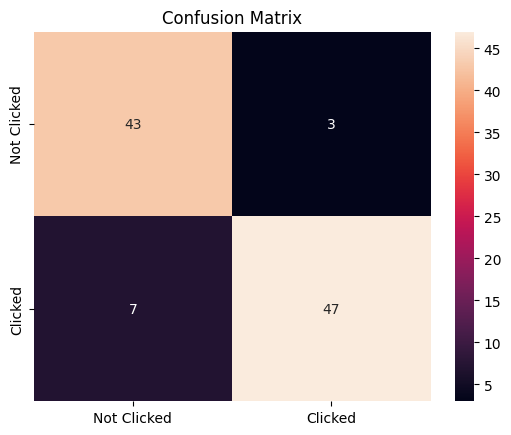

In [451]:
from sklearn.metrics import classification_report, confusion_matrix

# Confusion Matrix

cm = confusion_matrix(y_test, prediction)
sns.heatmap(cm, annot = True, fmt = "d", xticklabels = ['Not Clicked', 'Clicked'], yticklabels = ['Not Clicked', 'Clicked']).set(title = 'Confusion Matrix')
plt.show()

In [452]:
# Classification Report

print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

         0.0       0.86      0.93      0.90        46
         1.0       0.94      0.87      0.90        54

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100



In [461]:
# Sample Prediction (Input the Scaled Version)

y_prediction = model.predict([X[499,:2]])
y_prediction

array([0.])

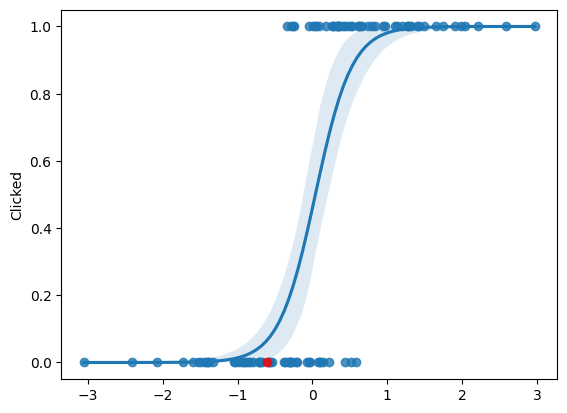

In [471]:
# Plot Logistic Regression Curve (Time Spent on Site)

sns.regplot(x = X_test[:,0], y = prediction, data = new_data, logistic = True).set(ylabel = 'Clicked')
sns.regplot(x = X[449,:1], y = y_prediction, data = new_data, logistic = True, color = 'red').set(ylabel = 'Clicked')
plt.show()


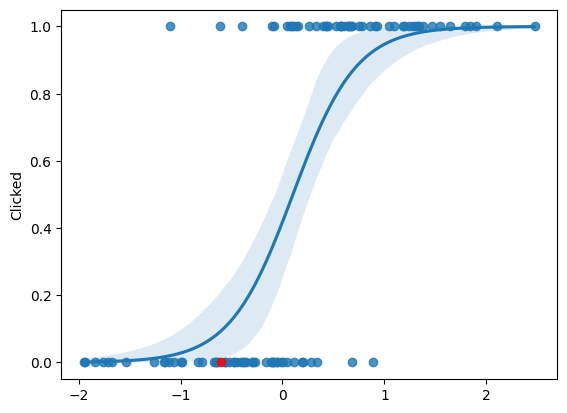

In [472]:
# Plot Logistic Regression Curve (Salary)

sns.regplot(x = X_test[:,1], y = prediction, data = new_data, logistic = True).set(ylabel = 'Clicked')
sns.regplot(x = X[449,:1], y = y_prediction, data = new_data, logistic = True, color = 'red').set(ylabel = 'Clicked')
plt.show()